### Random Forest Algorithm

In [1]:
##import the required libararies for this algo
import pandas as pd
# import the load_digits dataset
from sklearn.datasets import load_digits
# import the data 
digits = load_digits()

In [2]:
# first just see the digits.data
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [3]:
# now we are plotting our matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

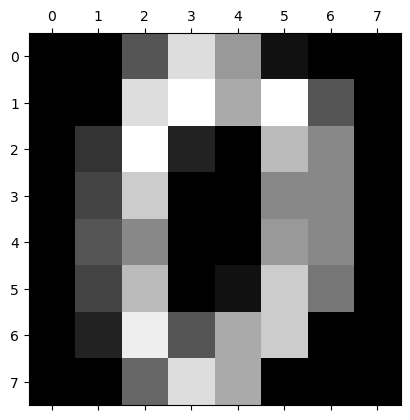

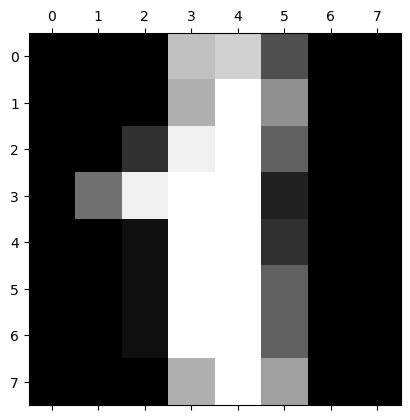

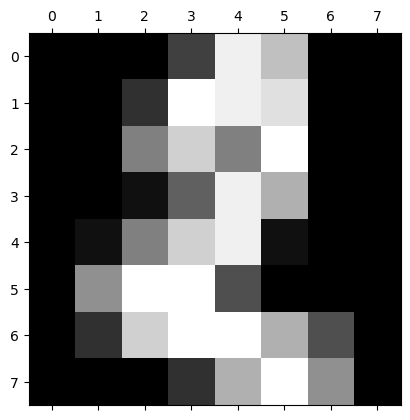

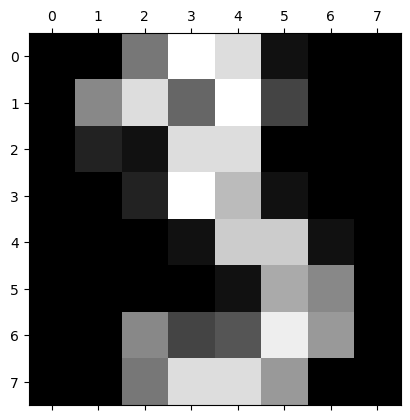

In [4]:
## plot the gray image
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
# this is our target variable
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target[:4]

array([0, 1, 2, 3])

In [8]:
# now create the dataframe and show the data
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
# now we can create the model
# X will be without target column
X = df.drop('target',axis='columns')
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [11]:
y=df.target
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [12]:
# we have taken train test split for sklearn
from sklearn.model_selection import train_test_split
# distribute our data in train and test where test we have taken 20% data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1539,0.0,0.0,0.0,7.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,15.0,1.0,0.0,0.0
1175,0.0,0.0,10.0,16.0,16.0,8.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,5.0,16.0,10.0,0.0,0.0,0.0
1395,0.0,0.0,8.0,16.0,15.0,4.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0
912,0.0,0.0,3.0,14.0,8.0,6.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,15.0,2.0,0.0,0.0,0.0
1663,0.0,0.0,1.0,13.0,15.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,12.0,11.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.0,0.0,6.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,4.0,15.0,16.0,13.0,2.0,0.0
104,0.0,0.0,0.0,8.0,14.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,13.0,8.0,0.0,0.0
1036,0.0,0.0,6.0,12.0,10.0,14.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,11.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,10.0,15.0,3.0,0.0,0.0,0.0,0.0,...,14.0,2.0,0.0,0.0,1.0,9.0,15.0,16.0,11.0,0.0


In [14]:
# now check the length of X_train and X_test
print("The Data Length for X_train :", len(X_train))
print("The Data Length for X_test :", len(X_test))
print("The total data size is :", len(X))

The Data Length for X_train : 1437
The Data Length for X_test : 360
The total data size is : 1797


In [15]:
# now we have create the model for random forest classifier
from sklearn.ensemble import RandomForestClassifier
# n_estimators are number of parameters
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
# now we can check the model score and accuracy
model.score(X_test , y_test)

0.9861111111111112

In [18]:
# check with n_estimators =100
from sklearn.ensemble import RandomForestClassifier
# here we can change the value of n_estimators
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
# now we can check the model score and accuracy with n_estimators =100
model.score(X_test , y_test)

0.9833333333333333

In [21]:
# find out the y_predicted
y_predicted = model.predict(X_test)
y_predicted

array([0, 9, 0, 6, 5, 1, 4, 1, 2, 1, 2, 3, 3, 3, 9, 4, 8, 5, 4, 2, 6, 3,
       0, 5, 2, 7, 1, 8, 1, 8, 5, 5, 5, 7, 3, 9, 9, 6, 6, 0, 1, 6, 8, 0,
       2, 2, 6, 9, 9, 5, 9, 9, 8, 4, 3, 5, 7, 4, 6, 3, 9, 3, 4, 9, 1, 2,
       6, 3, 9, 6, 5, 0, 9, 6, 5, 5, 1, 5, 1, 6, 3, 3, 7, 0, 5, 8, 7, 5,
       5, 7, 1, 0, 3, 6, 2, 4, 7, 8, 2, 9, 4, 8, 7, 7, 1, 7, 1, 7, 7, 0,
       3, 9, 1, 9, 3, 5, 3, 6, 7, 8, 9, 1, 5, 1, 7, 2, 1, 3, 7, 6, 2, 5,
       4, 6, 1, 6, 4, 1, 8, 0, 4, 6, 8, 6, 2, 2, 1, 5, 8, 3, 8, 1, 2, 1,
       1, 2, 6, 8, 6, 8, 1, 3, 0, 3, 9, 5, 9, 1, 5, 9, 3, 0, 7, 8, 5, 1,
       9, 3, 9, 4, 0, 9, 3, 4, 8, 4, 5, 7, 2, 6, 3, 6, 0, 5, 7, 0, 5, 4,
       5, 3, 5, 9, 6, 9, 8, 9, 1, 2, 2, 0, 4, 4, 7, 3, 5, 1, 8, 5, 6, 3,
       0, 6, 8, 0, 2, 3, 6, 6, 2, 2, 7, 5, 2, 1, 5, 0, 2, 1, 1, 0, 4, 0,
       5, 7, 3, 2, 4, 7, 6, 2, 4, 0, 0, 1, 2, 8, 4, 8, 9, 8, 6, 2, 6, 2,
       0, 6, 0, 2, 8, 8, 2, 0, 1, 0, 8, 4, 3, 6, 4, 7, 2, 4, 9, 8, 5, 6,
       9, 7, 0, 8, 5, 6, 7, 9, 0, 3, 8, 3, 1, 8, 8,

In [22]:
# now we have to create one confusion matrix
# Now we can create confusion matrix
from sklearn.metrics import confusion_matrix
# create the confusion matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[34,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]])

Text(95.72222222222221, 0.5, 'Truth')

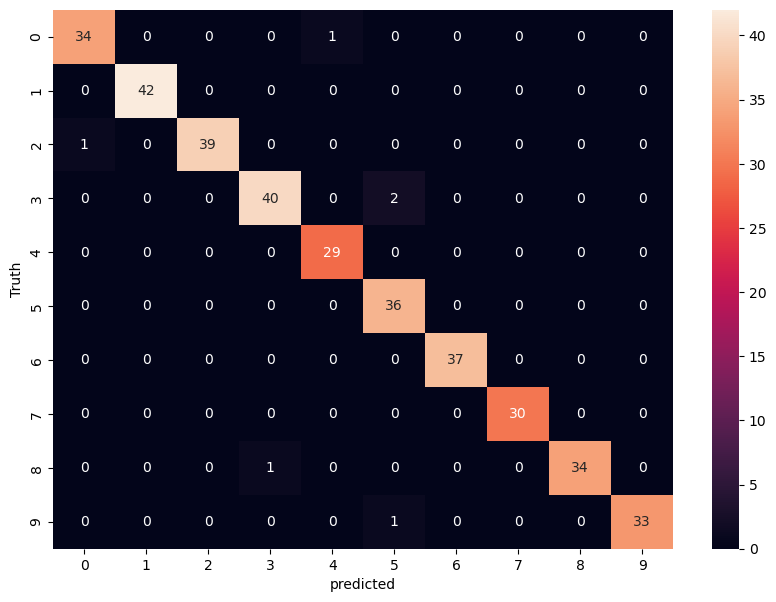

In [23]:
# create the matplotlib graph
%matplotlib inline
#matplotlib we have to add
import matplotlib.pyplot as plt
# create the seaborn library
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

## Excersize

Use famous iris flower dataset from sklearn.datasets to predict flower species using random
forest classifier.
1.Measure prediction score using default n_estimators(10)
2.Now fine tune your model by changing number of trees in your classifier and tell me what
best score you can get using how many trees.